In [5]:
# Importamos librerias necesarias
import charset_normalizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install missingno
import missingno as msno # Esta sirve para verificar valores faltantes / nulls
from itertools import combinations # Sirve para generar todas las combinaciones posibles sin repeticion de un conjunto de elementos

# Comprobar encoding de los dataset
with open('athletes.csv', 'rb') as rawdata:
    rawdata1 = charset_normalizer.detect(rawdata.read(10000))
print(rawdata1) # {'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}

with open('olympic_games_results.csv', 'rb') as rawdata:
    rawdata2 = charset_normalizer.detect(rawdata.read(10000))
print(rawdata2) # {'encoding': 'utf-8', 'language': 'French', 'confidence': 1.0}



{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}
{'encoding': 'utf-8', 'language': 'French', 'confidence': 1.0}


In [6]:
# Cargamos las dos bases de datos en dataframes
athletes_df = pd.read_csv('athletes.csv', encoding='utf-8')
olympic_df = pd.read_csv('olympic_games_results.csv', encoding='utf-8')

athletes_df.shape # shape nos devuelve info sobre el nº de filas y columnas

(145500, 10)

In [7]:
olympic_df.shape 

(308408, 11)

In [8]:
# IMPORTANTE - Unimos ambas bases de datos en un solo dataframe

merged_df = pd.merge(olympic_df, athletes_df, on='athlete_id', how='inner')
merged_df.sample(10) # sample nos devuelve X registro del dataframe al azar

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
114665,1924.0,Summer,Swimming (Aquatics),"200 metres Breaststroke, Men (Olympic)",Bill Kirschbaum,51447,USA,NaN,3.0,False,Bronze,Bill Kirschbaum,1902-11-05,Fort Williams,Maine,USA,United States,NaN,NaN,1953-04-29
46052,1960.0,Summer,Fencing,"Foil, Individual, Men (Olympic)","Joseph Paletta, Jr.",23775,USA,NaN,5.0,False,NaN,"Joseph Paletta, Jr.",1937-11-15,New York,New York,USA,United States,185.0,79.0,NaN
211654,1988.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Ernst Vettori,98632,AUT,NaN,28.0,False,NaN,Ernst Vettori,1964-06-25,Hall in Tirol,Tirol,AUT,Austria,167.0,55.0,NaN
229451,2008.0,Summer,Boxing,"Light-Welterweight, Men (Olympic)",Gennady Kovalyov,106178,RUS,NaN,5.0,True,NaN,Gennady Kovalyov,1983-05-17,Krolotkin,Krasnodar Kray,RUS,Russian Federation,173.0,64.0,NaN
117801,1984.0,Summer,Water Polo (Aquatics),"Water Polo, Men (Olympic)",Martin Callaghan,53384,AUS,Australia,5.0,False,NaN,Martin Callaghan,1962-08-03,NaN,NaN,NaN,Australia,184.0,94.0,NaN
178323,1984.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Men (Olympic)",Grega Benedik,83993,YUG,NaN,NaN,False,NaN,Grega Benedik,1962-05-21,Jesenice,Jesenice,SLO,Yugoslavia,183.0,82.0,NaN
102780,1908.0,Summer,Swimming (Aquatics),"200 metres Breaststroke, Men (Olympic)",Sydney Gooday,47269,GBR,NaN,3.0,False,NaN,Sydney Gooday,1887-09-04,Croydon,England,GBR,Canada Great Britain,NaN,NaN,1964-07-18
166966,1900.0,Summer,Swimming (Aquatics),"200 metres Team Swimming, Men (Olympic)",Gustav Lexau,79798,GER,Deutscher Schwimm Verband Berlin,1.0,False,Gold,Gustav Lexau,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN
14149,1960.0,Summer,Canoe Sprint (Canoeing),"Kayak Singles, 1,000 metres, Men (Olympic)",Michael Brown,9255,CAN,NaN,4.0,False,NaN,Michael Brown,1937-08-21,Montréal,Québec,CAN,Canada,179.0,74.0,NaN
84594,1948.0,Summer,Rowing,"Eights, Men (Olympic)",Carlos do Roque,39452,POR,Portugal,2.0,False,NaN,Carlos do Roque,NaN,NaN,NaN,NaN,Portugal,NaN,NaN,2014-01-01


In [9]:
merged_df.head(10)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
5,1996.0,Summer,Tennis,"Singles, Men (Olympic)",Arnaud Boetsch,2,FRA,NaN,17.0,True,NaN,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
6,1996.0,Summer,Tennis,"Doubles, Men (Olympic)",Arnaud Boetsch,2,FRA,Guillaume Raoux,17.0,True,NaN,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
7,1924.0,Summer,Tennis,"Singles, Men (Olympic)",Jean Borotra,3,FRA,NaN,4.0,False,NaN,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
8,1924.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean Borotra,3,FRA,Marguerite Billout,15.0,True,NaN,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17


In [10]:
merged_df.shape

(308408, 20)

In [11]:
merged_df.describe()

,year,athlete_id,place,height_cm,weight_kg
count,305807.000000,308408.000000,283193.000000,236910.000000,227290.000000
mean,1982.239223,72624.097125,16.102764,175.349989,70.554525
std,30.983982,41285.940841,19.322611,10.450750,14.163273
min,1896.000000,1.000000,1.000000,127.000000,25.000000
25%,1964.000000,34412.000000,5.000000,168.000000,60.000000
50%,1992.000000,73739.500000,9.000000,175.000000,70.000000
75%,2008.000000,107168.000000,20.000000,183.000000,79.000000
max,2022.000000,148986.000000,185.000000,226.000000,198.000000


In [12]:
merged_df.describe(include='all')

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
count,305807.000000,305807,308407,308408,308408,308408.000000,308407,121714,283193.000000,308408,44139,308408,305692,246890,246890,246890,308408,236910.000000,227290.000000,73521
unique,NaN,2,93,1191,144005,NaN,230,19413,NaN,2,3,142547,41257,22337,2554,236,696,NaN,NaN,20007
top,NaN,Summer,Athletics,"Football, Men (Olympic)",Heikki Savolainen,NaN,USA,United States,NaN,False,Bronze,Heikki Savolainen,1931-01-01,Budapest,England,USA,United States,NaN,NaN,1968-01-01
freq,NaN,241298,45916,6135,39,NaN,21353,6149,NaN,262468,14810,39,130,3638,9860,19802,21223,NaN,NaN,117
mean,1982.239223,NaN,NaN,NaN,NaN,72624.097125,NaN,NaN,16.102764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.349989,70.554525,NaN
std,30.983982,NaN,NaN,NaN,NaN,41285.940841,NaN,NaN,19.322611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.450750,14.163273,NaN
min,1896.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.000000,25.000000,NaN
25%,1964.000000,NaN,NaN,NaN,NaN,34412.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000000,60.000000,NaN
50%,1992.000000,NaN,NaN,NaN,NaN,73739.500000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,70.000000,NaN
75%,2008.000000,NaN,NaN,NaN,NaN,107168.000000,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.000000,79.000000,NaN


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         44139 non-null   object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  NOC           308408 non-null  object 
 17  height_cm     236910 non-null  float64
 18  weig

In [14]:
print(merged_df.isnull().sum())

year              2601
type              2601
discipline           1
event                0
as                   0
athlete_id           0
noc                  1
team            186694
place            25215
tied                 0
medal           264269
name                 0
born_date         2716
born_city        61518
born_region      61518
born_country     61518
NOC                  0
height_cm        71498
weight_kg        81118
died_date       234887
dtype: int64


In [15]:
print((merged_df.isnull().mean() * 100).sort_values(ascending=False))

medal           85.688114
died_date       76.161124
team            60.534746
weight_kg       26.302171
height_cm       23.182927
born_country    19.946953
born_region     19.946953
born_city       19.946953
place            8.175858
born_date        0.880652
year             0.843363
type             0.843363
discipline       0.000324
noc              0.000324
event            0.000000
tied             0.000000
NOC              0.000000
athlete_id       0.000000
as               0.000000
name             0.000000
dtype: float64


In [16]:
duplicated = merged_df.duplicated().sum()
print(duplicated)

126


In [17]:
var_num = merged_df.select_dtypes(exclude='object').columns.to_list()

var_cat = merged_df.select_dtypes(include='object').columns.to_list()

In [18]:
var_cat

['type',
 'discipline',
 'event',
 'as',
 'noc',
 'team',
 'medal',
 'name',
 'born_date',
 'born_city',
 'born_region',
 'born_country',
 'NOC',
 'died_date']

In [19]:
compare_columns = merged_df['noc'].equals(merged_df['NOC'])
compare_columns

False

In [20]:
compare_columns2 = merged_df['as'].equals(merged_df['name'])
compare_columns2

False

In [21]:
for col in merged_df.columns:
    print(f"{col}: {merged_df[col].unique()}\n\n")

year: [1912. 1920. 1996. 1924. 1992. 2000. 2004. 2008. 1900.   nan 1908. 1896.
 1984. 1988. 1904. 2012. 2016. 1976. 1972. 1980. 1928. 2020. 1968. 1956.
 1952. 1960. 1964. 1948. 1932. 1936. 2002. 2006. 2010. 1994. 1998. 2014.
 2018. 2022.]


type: ['Summer' nan 'Winter']


discipline: ['Tennis' 'Table Tennis' 'Fencing' 'Badminton' 'Hockey' 'Athletics'
 'Art Competitions' 'Modern Pentathlon' 'Archery' 'Boxing'
 'Softball (Baseball/Softball)' 'Baseball (Baseball/Softball)' 'Sailing'
 'Golf' 'Jeu De Paume' 'Basketball (Basketball)' 'Cycling Road (Cycling)'
 'Handball' 'Australian Rules Football' 'Bobsleigh (Bobsleigh)'
 'Canoe Sprint (Canoeing)' 'Canoe Slalom (Canoeing)'
 'Canoe Marathon (Canoeing)' 'Shooting' 'Rowing' 'Cycling Track (Cycling)'
 'Polo' 'Rugby (Rugby)' 'Equestrian Dressage (Equestrian)'
 'Equestrian Eventing (Equestrian)' 'Equestrian Jumping (Equestrian)'
 'Tug-Of-War' 'Lacrosse' 'Diving (Aquatics)' 'Winter Pentathlon'
 'Equestrian Vaulting (Equestrian)' 'Equestrian Driving

In [22]:
merged_df.drop('NOC', axis=1, inplace=True)
merged_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,name,born_date,born_city,born_region,born_country,height_cm,weight_kg,died_date
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02


In [23]:
merged_df.shape

(308408, 19)

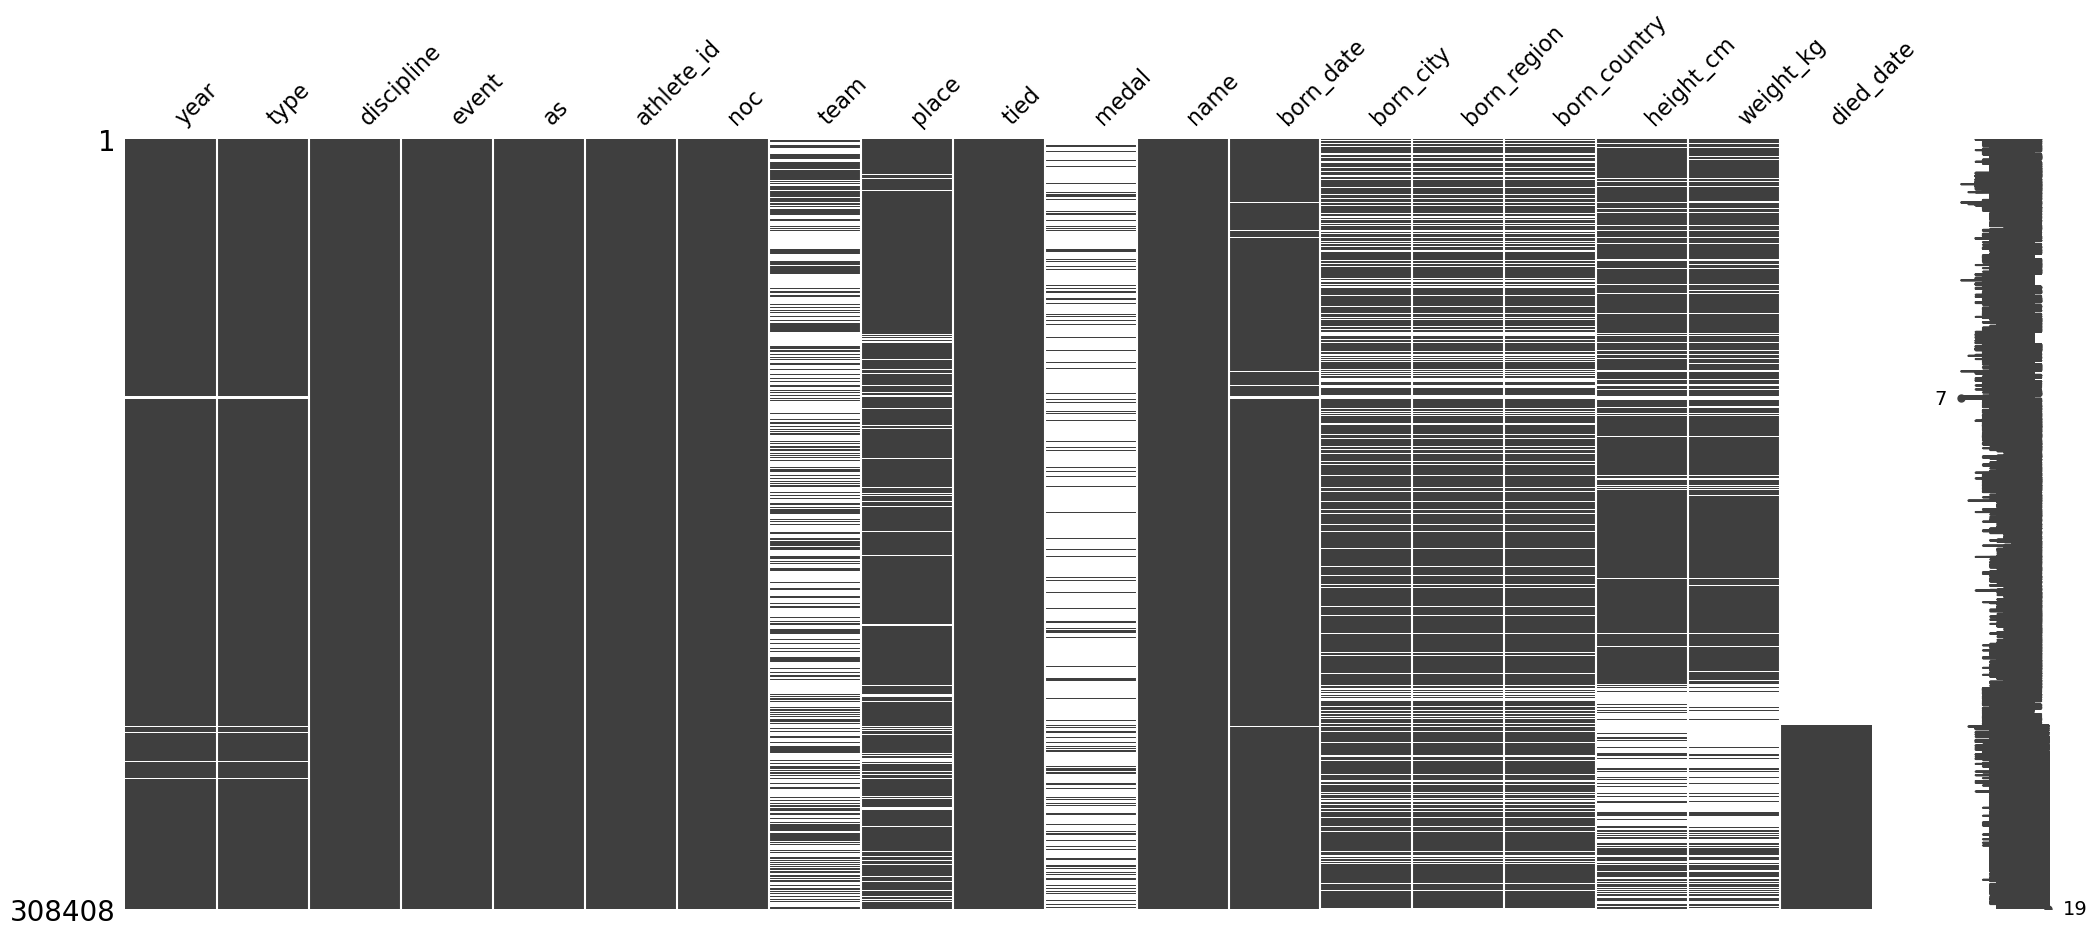

In [24]:
df_sorted = merged_df.sort_values('died_date', na_position='first')  # Ordenar por la columna 'edad'
msno.matrix(df_sorted)
plt.show()

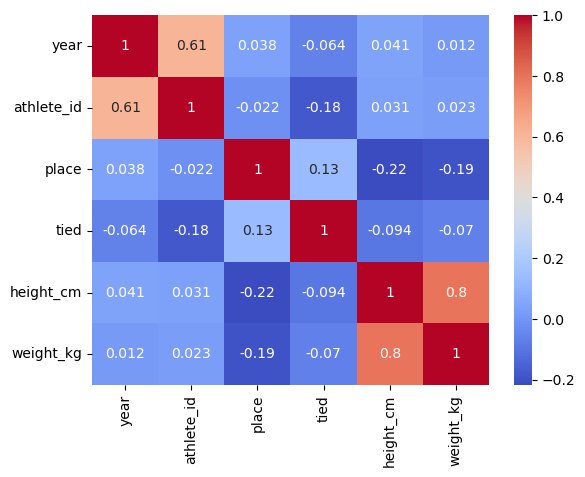

In [25]:
corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# ANÁLISIS UNIDIMENSIONAL

## Unidimensional numérico

In [28]:
# valores colormap
TABLEAU_CMP = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', \
               'tab:gray','tab:olive', 'tab:cyan')

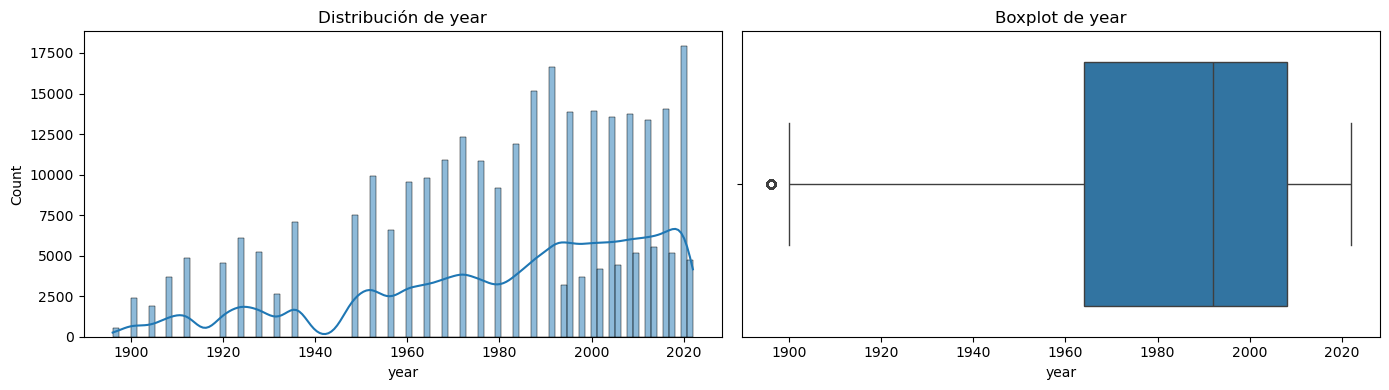

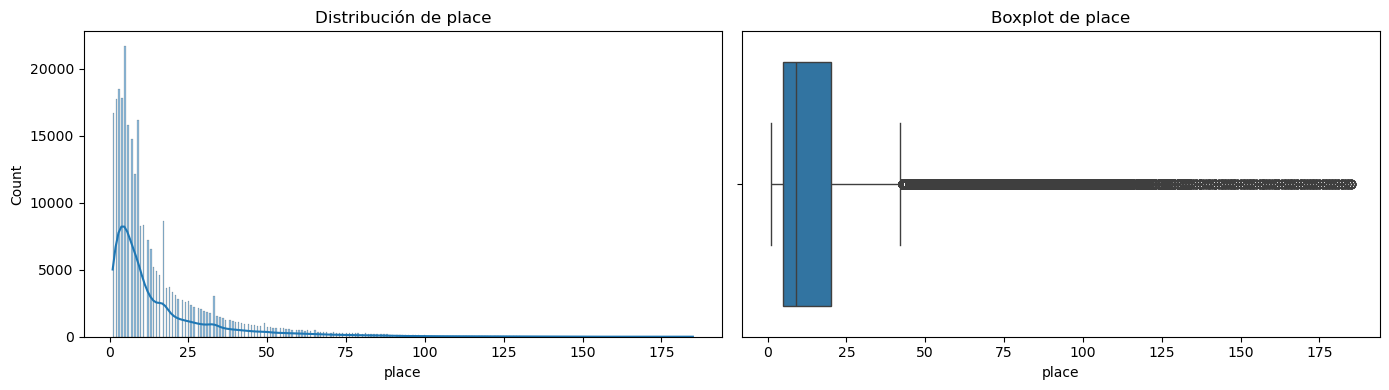

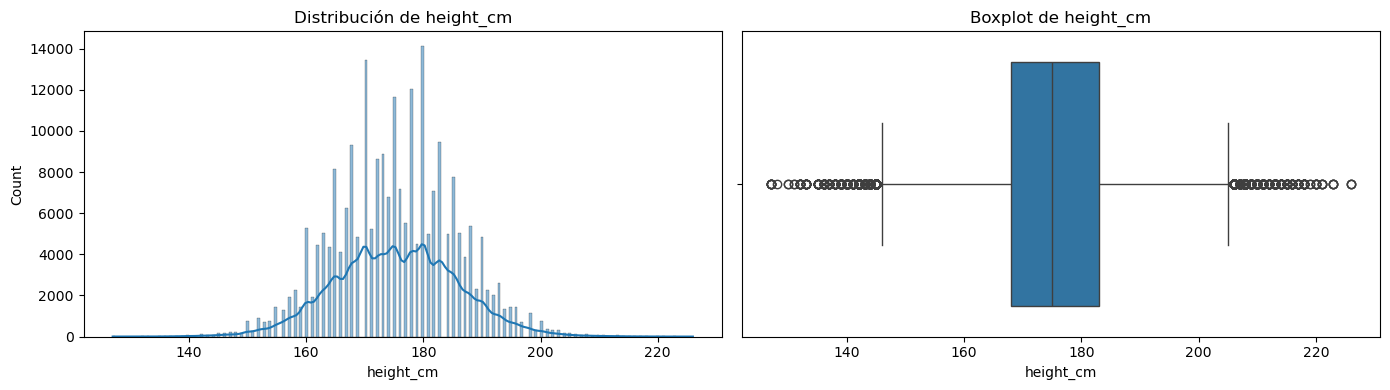

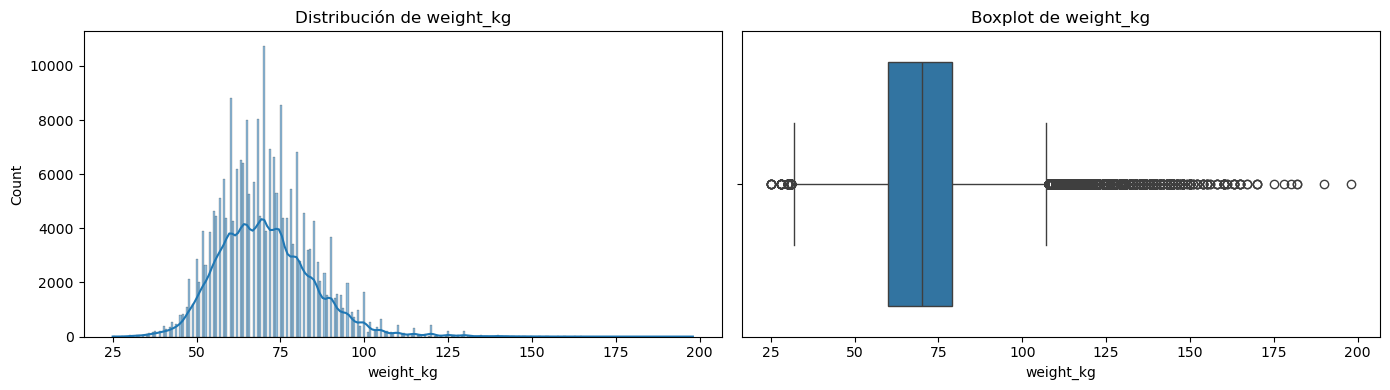

In [29]:
# creamos la grafica
numericas = merged_df.select_dtypes(include=np.number).drop(columns='athlete_id')
categoricas = merged_df.select_dtypes(include='object')

# graficas distribucion y boxplot de cada atributo

for col in numericas.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma con KDE
    sns.histplot(numericas[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    axs[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=numericas[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    axs[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

## Univariado categórico

In [31]:
# colores = sns.color_palette("husl", len(var_cat))


Valores únicos en type: 2


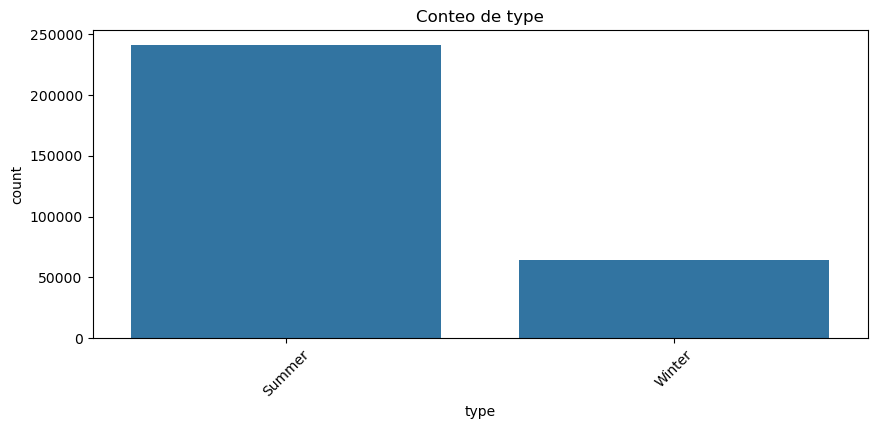


Valores únicos en discipline: 93
Demasiadas categorías para graficar discipline de forma legible.

Valores únicos en event: 1191
Demasiadas categorías para graficar event de forma legible.

Valores únicos en as: 144005
Demasiadas categorías para graficar as de forma legible.

Valores únicos en noc: 230
Demasiadas categorías para graficar noc de forma legible.

Valores únicos en team: 19413
Demasiadas categorías para graficar team de forma legible.

Valores únicos en medal: 3


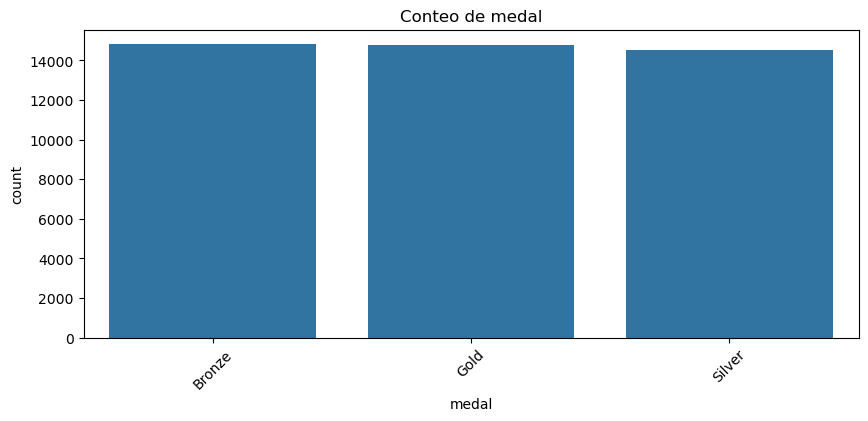


Valores únicos en name: 142547
Demasiadas categorías para graficar name de forma legible.

Valores únicos en born_date: 41257
Demasiadas categorías para graficar born_date de forma legible.

Valores únicos en born_city: 22337
Demasiadas categorías para graficar born_city de forma legible.

Valores únicos en born_region: 2554
Demasiadas categorías para graficar born_region de forma legible.

Valores únicos en born_country: 236
Demasiadas categorías para graficar born_country de forma legible.

Valores únicos en died_date: 20007
Demasiadas categorías para graficar died_date de forma legible.


In [32]:
for col in categoricas.columns:
        print(f"\nValores únicos en {col}: {merged_df[col].nunique()}")
        if merged_df[col].nunique() <= 20:
            plt.figure(figsize=(10,4))
            sns.countplot(data=merged_df, x=col, order=merged_df[col].value_counts().index)
            plt.title(f'Conteo de {col}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Demasiadas categorías para graficar {col} de forma legible.")




# # creacion graficas
# fig, axes = plt.subplots(len(var_cat), 1, \
#                          figsize=(10, 5*len(var_cat)),\
#                          gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

# ax = axes.ravel()

# # dibujamos las graficas
# for idx,variable in enumerate(var_cat):

# # utilizar el método de dibujo que nos interese en cada momento
# # sustituir nombre dataframe y parámetros según método de dibujo
#     sns.countplot(merged_df[variable], ax=ax[idx],\
#                   palette=colores)

#     ax[idx].set_title(f'HISTOGRAMA {variable}')
#     ax[idx].set_xlabel(f'Valores atributo {variable}')
#     ax[idx].set_ylabel("Frequencia")

# for idx, variable in enumerate(var_cat):
#     counts = merged_df[variable].value_counts().sort_values(ascending=False)
#     counts.plot(kind='bar', ax=ax[idx], color='skyblue')
    
#     ax[idx].set_title(f'HISTOGRAMA {variable}')
#     ax[idx].set_xlabel(f'Valores atributo {variable}')
#     ax[idx].set_ylabel("Frecuencia")

In [34]:
print(merged_df.nunique())

year                37
type                 2
discipline          93
event             1191
as              144005
athlete_id      145262
noc                230
team             19413
place              185
tied                 2
medal                3
name            142547
born_date        41257
born_city        22337
born_region       2554
born_country       236
height_cm           95
weight_kg          141
died_date        20007
dtype: int64


In [35]:
print(merged_df['discipline'].unique())

['Tennis' 'Table Tennis' 'Fencing' 'Badminton' 'Hockey' 'Athletics'
 'Art Competitions' 'Modern Pentathlon' 'Archery' 'Boxing'
 'Softball (Baseball/Softball)' 'Baseball (Baseball/Softball)' 'Sailing'
 'Golf' 'Jeu De Paume' 'Basketball (Basketball)' 'Cycling Road (Cycling)'
 'Handball' 'Australian Rules Football' 'Bobsleigh (Bobsleigh)'
 'Canoe Sprint (Canoeing)' 'Canoe Slalom (Canoeing)'
 'Canoe Marathon (Canoeing)' 'Shooting' 'Rowing' 'Cycling Track (Cycling)'
 'Polo' 'Rugby (Rugby)' 'Equestrian Dressage (Equestrian)'
 'Equestrian Eventing (Equestrian)' 'Equestrian Jumping (Equestrian)'
 'Tug-Of-War' 'Lacrosse' 'Diving (Aquatics)' 'Winter Pentathlon'
 'Equestrian Vaulting (Equestrian)' 'Equestrian Driving (Equestrian)'
 'Cycling Mountain Bike (Cycling)' 'Speed Skating (Skating)'
 'Football (Football)' 'Bicycle Polo (Cycling)'
 'Cross Country Skiing (Skiing)' 'Racquets' 'Cricket' 'Croquet'
 'Motorboating' 'Swimming (Aquatics)' 'Ice Hockey (Ice Hockey)' 'Bandy'
 'Artistic Gymnastics (Gy

## Análisis Bivariado


###  Numérico-numérico

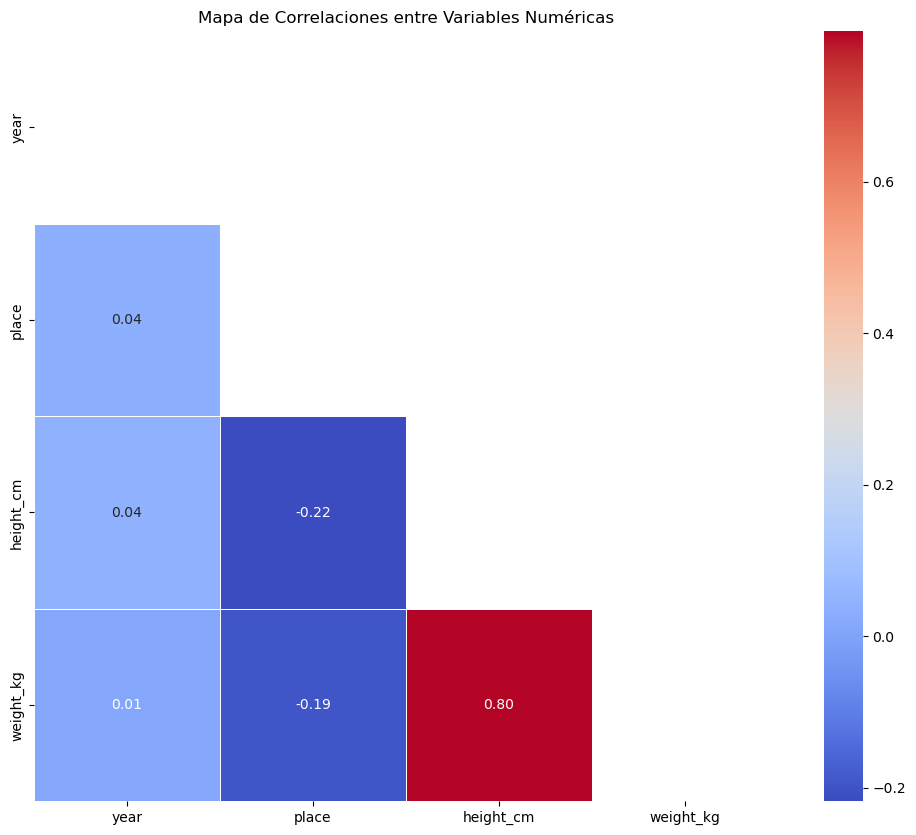

In [38]:
corr = numericas.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Numéricas')
plt.show()

### Categórico-categórico

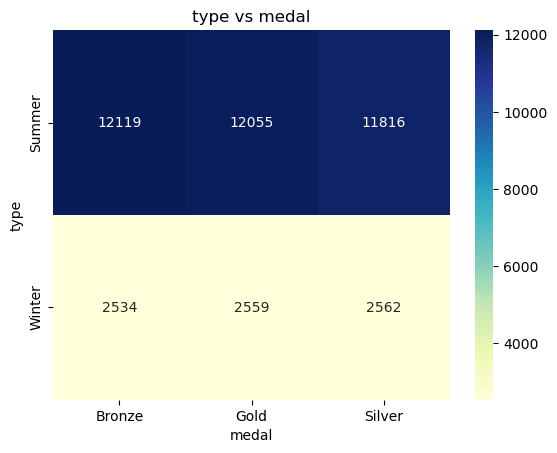

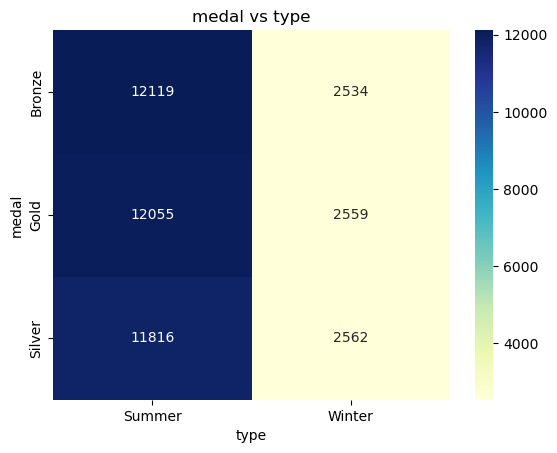

In [40]:
for col1 in categoricas.columns:
    for col2 in categoricas.columns:
        if col1 != col2 and merged_df[col1].nunique() <= 50 and merged_df[col2].nunique() <= 50:
            tabla = pd.crosstab(merged_df[col1], merged_df[col2])
            sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f'{col1} vs {col2}')
            plt.show()


Columnas después de limpiar NaN: ['type', 'discipline', 'event', 'as', 'noc', 'team', 'medal', 'name', 'born_date', 'born_city', 'born_region', 'born_country', 'died_date']
Columnas después de eliminar 'Otros' y NaN: ['type', 'discipline', 'event', 'as', 'noc', 'team', 'medal', 'name', 'born_date', 'born_city', 'born_region', 'born_country', 'died_date']
     type discipline                   event   as  noc team medal name  \
0  Summer        NaN  Singles, Men (Olympic)  NaN  FRA  NaN   NaN  NaN   
1  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   
2  Summer        NaN  Singles, Men (Olympic)  NaN  FRA  NaN   NaN  NaN   
3  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   
4  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   

  born_date born_city born_region born_country died_date  
0       NaN       NaN         NaN          FRA       NaN  
1       NaN       NaN         NaN          FRA       NaN  
2       NaN       NaN

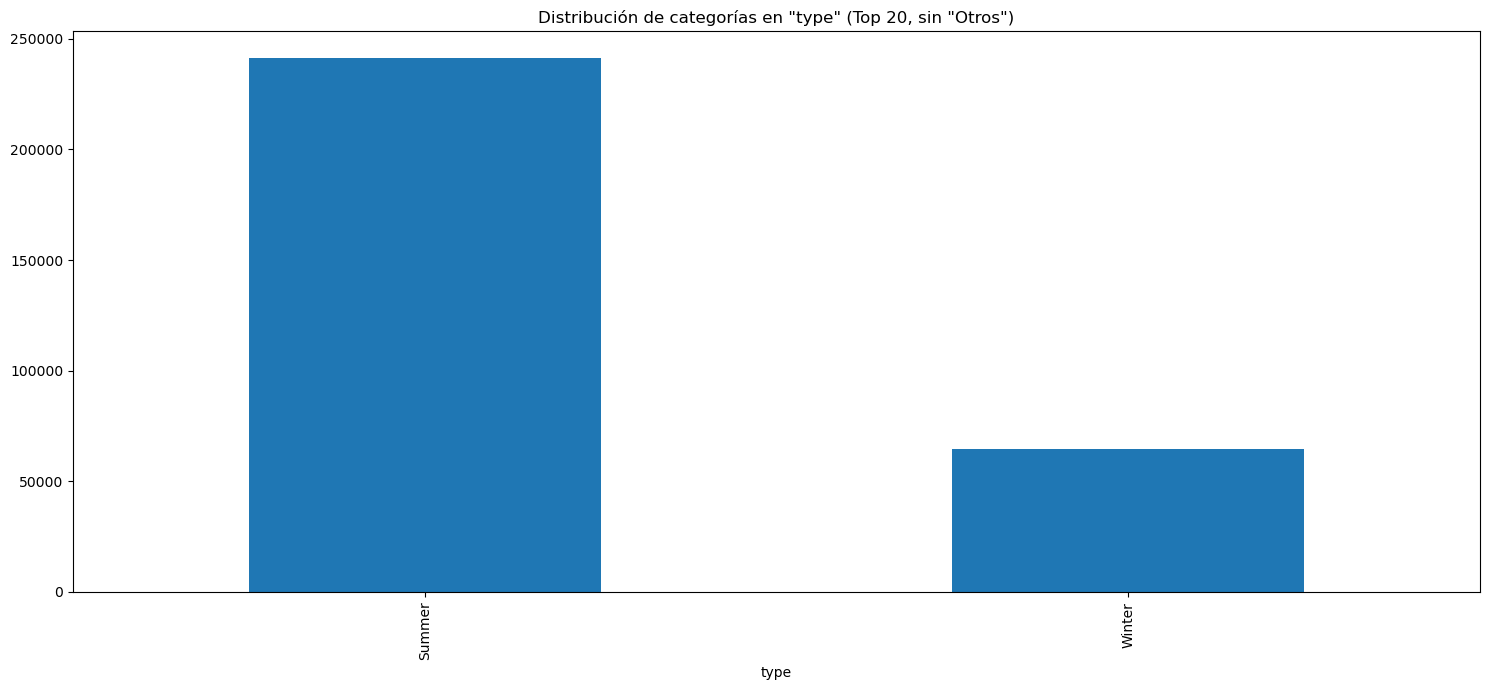

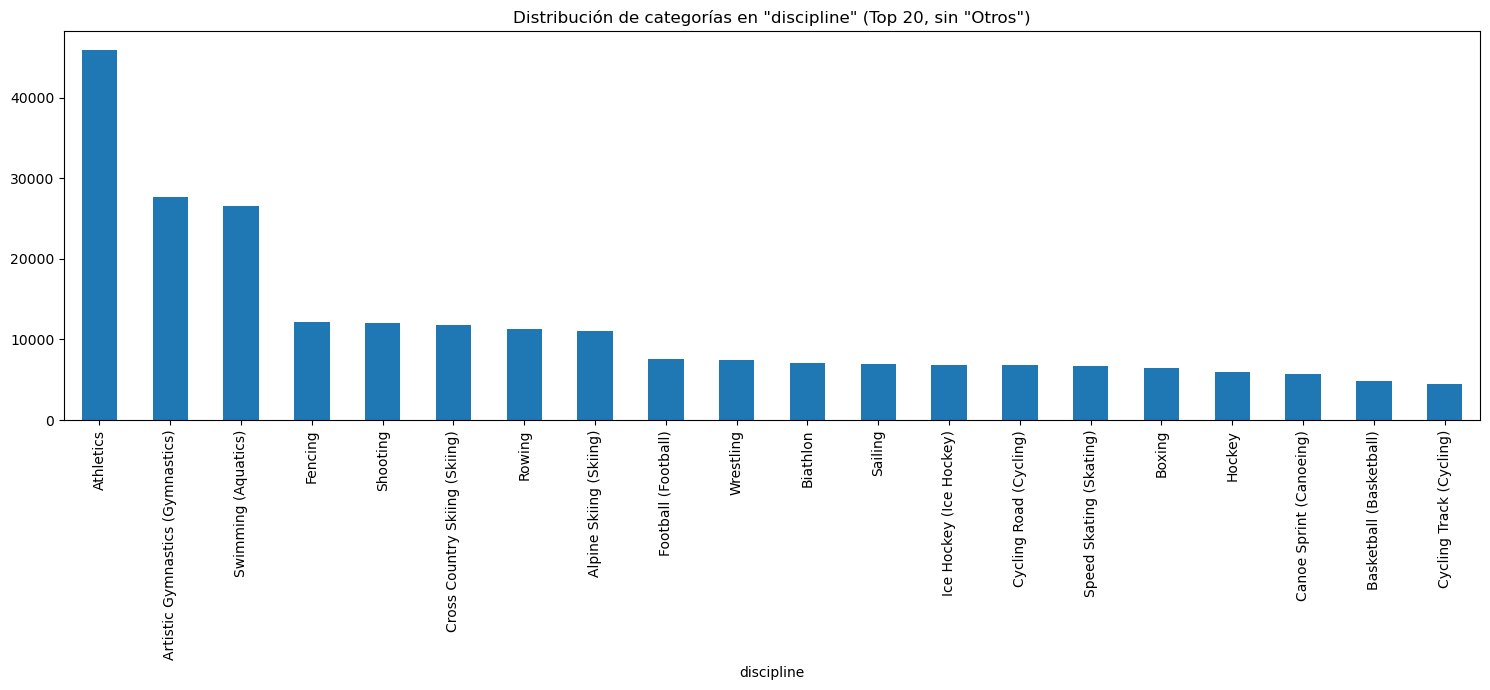

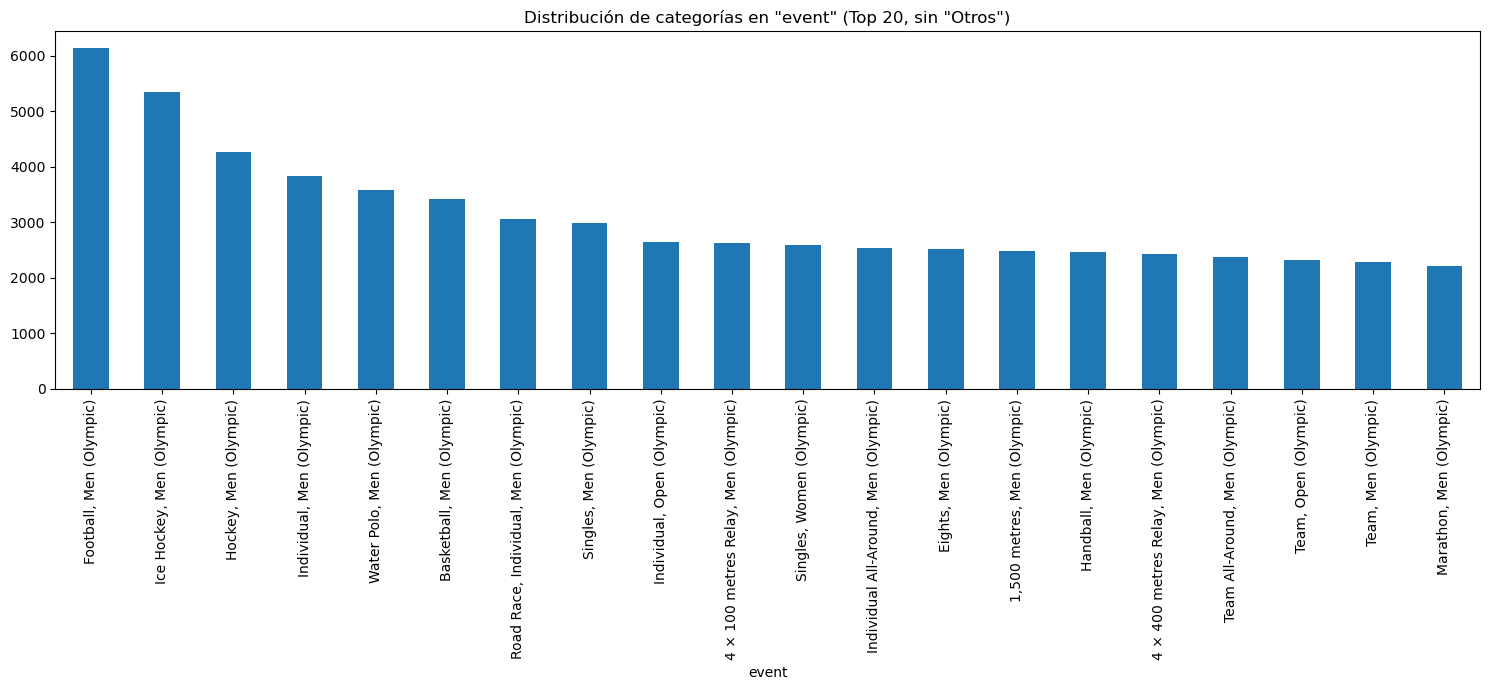

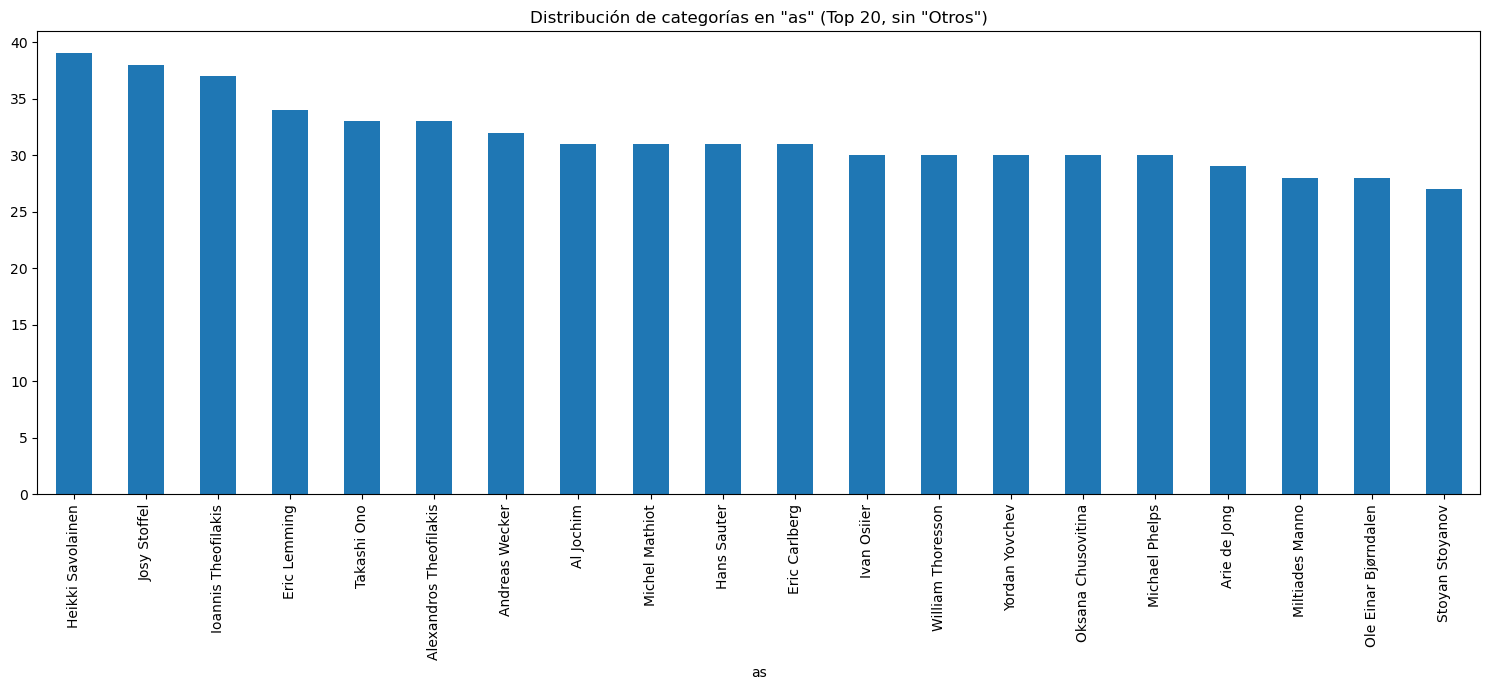

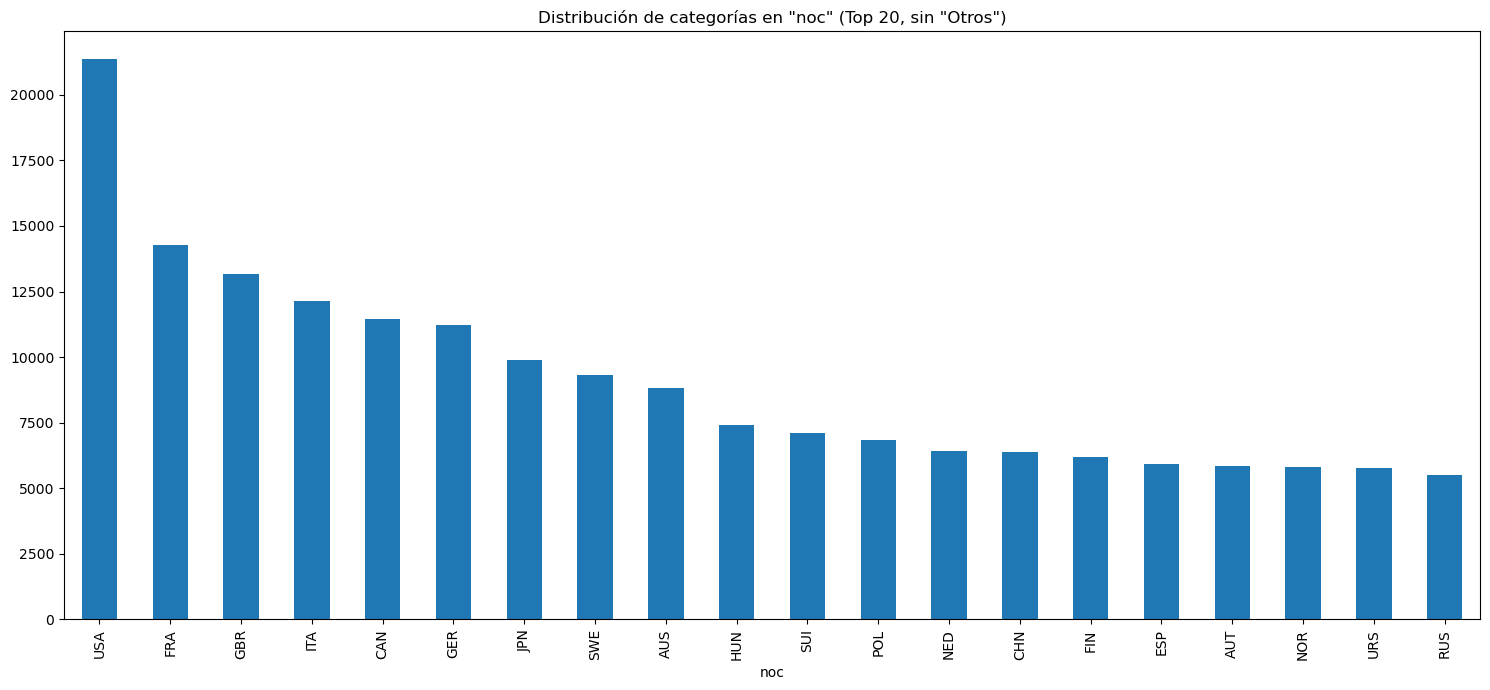

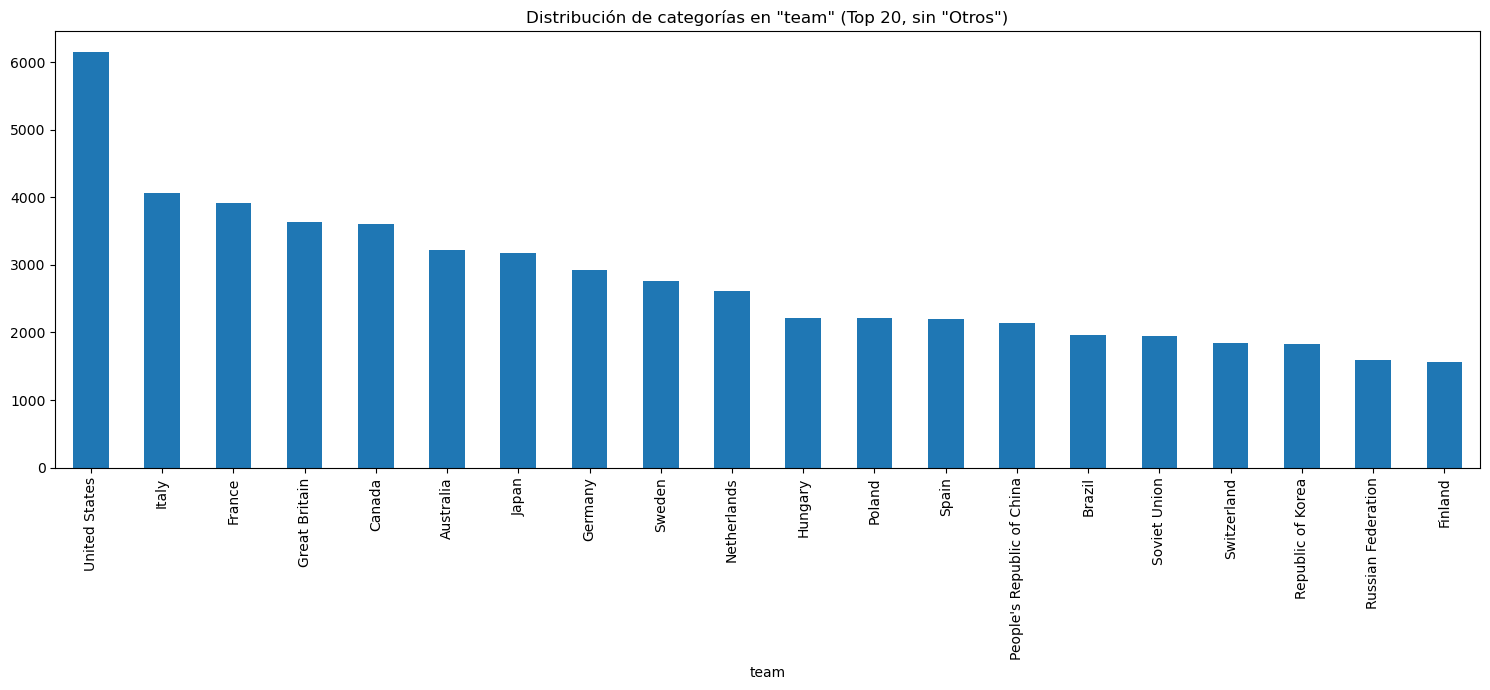

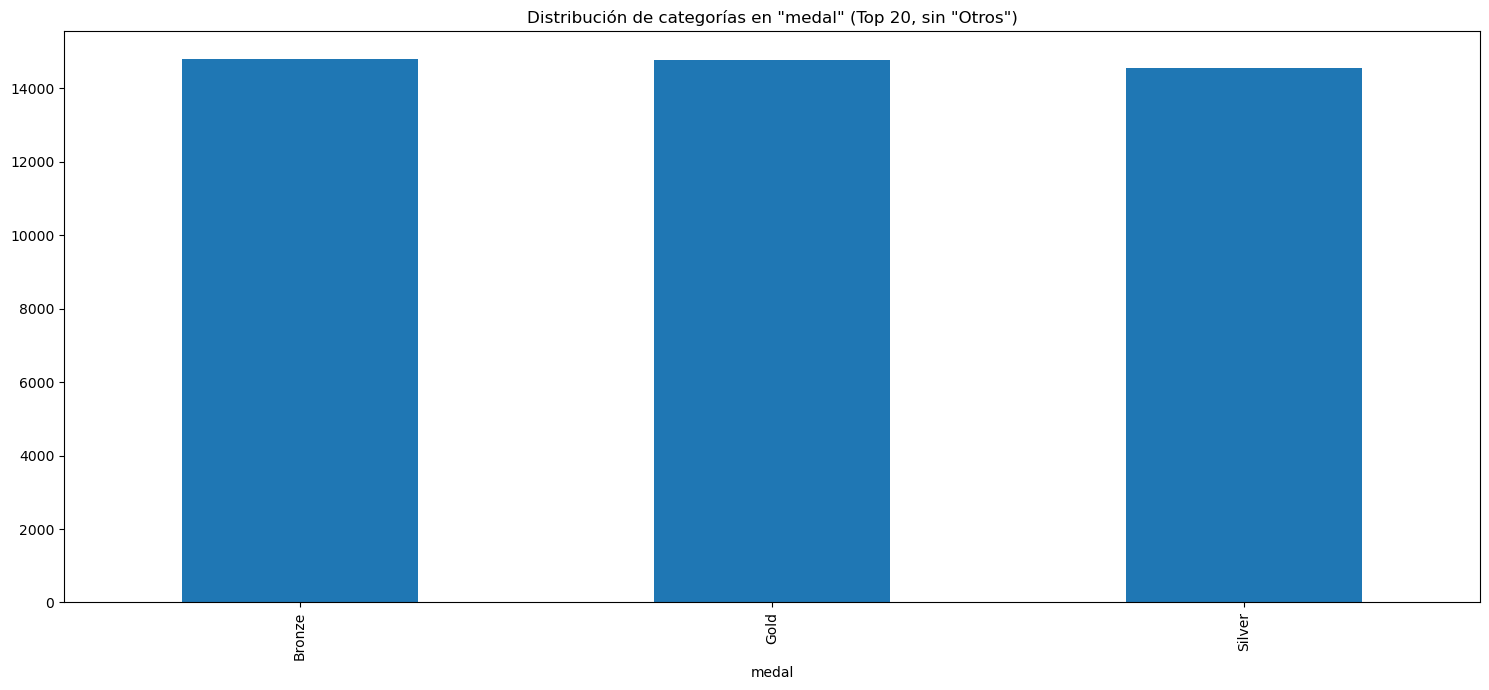

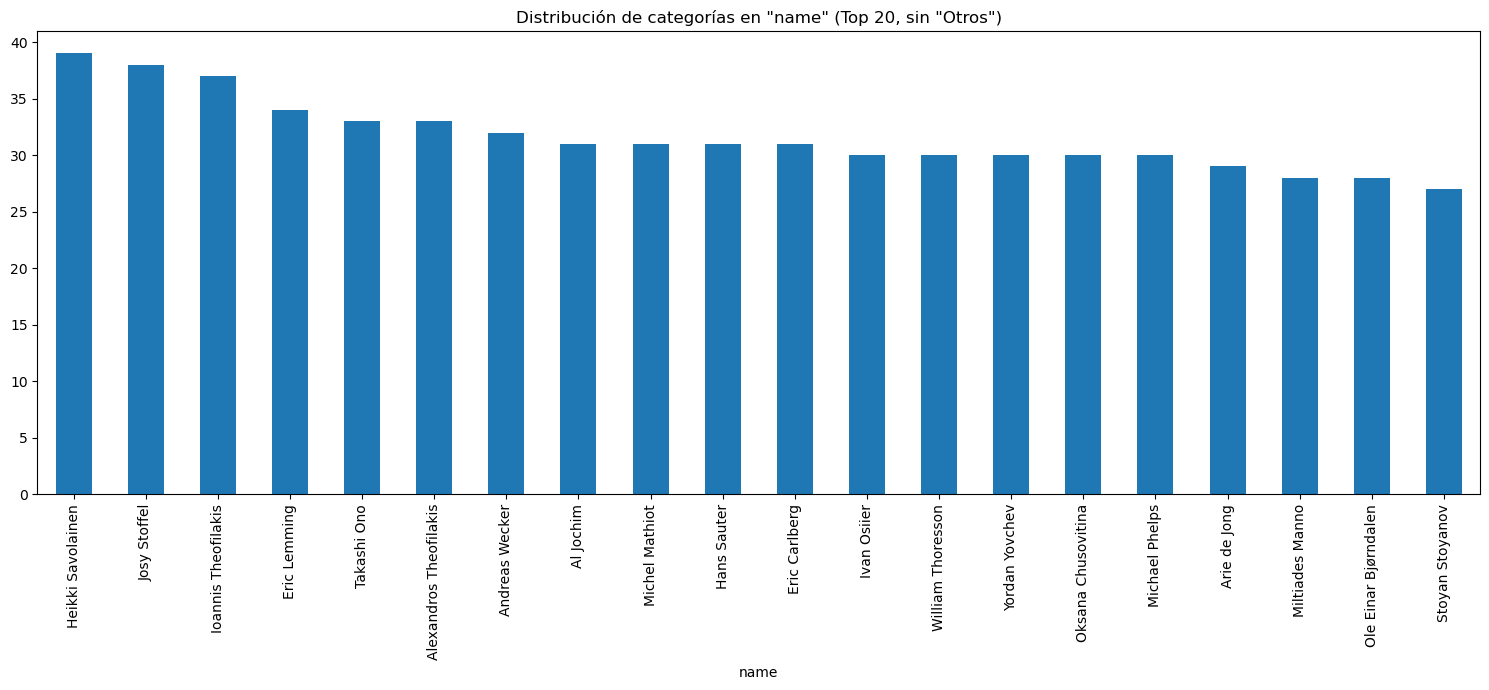

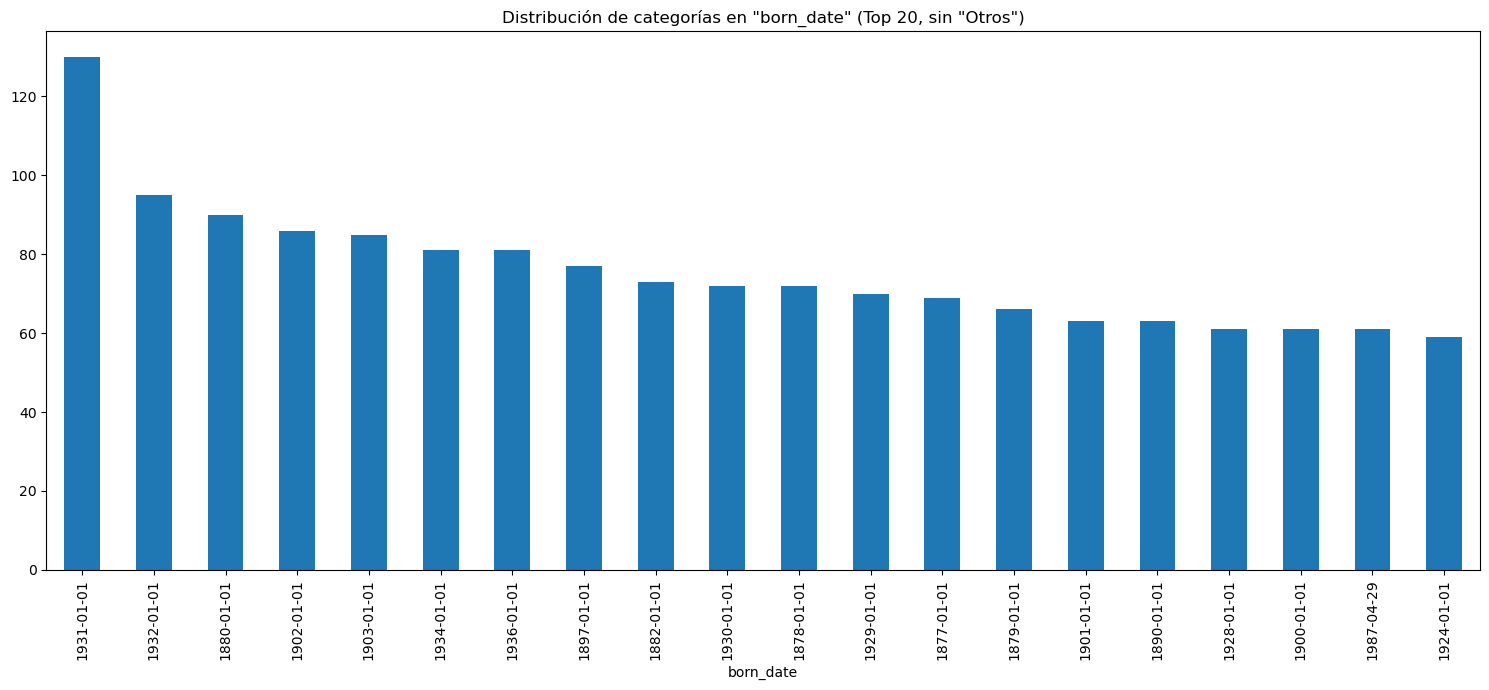

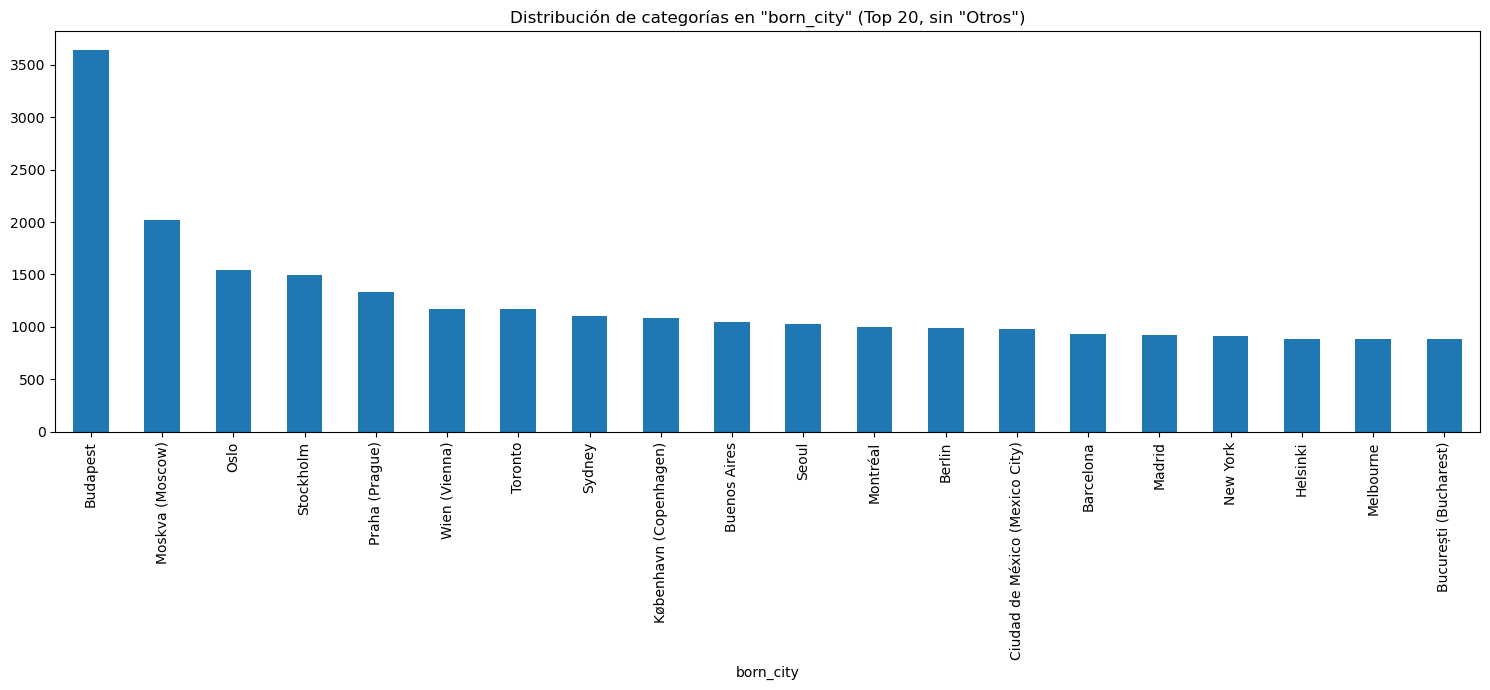

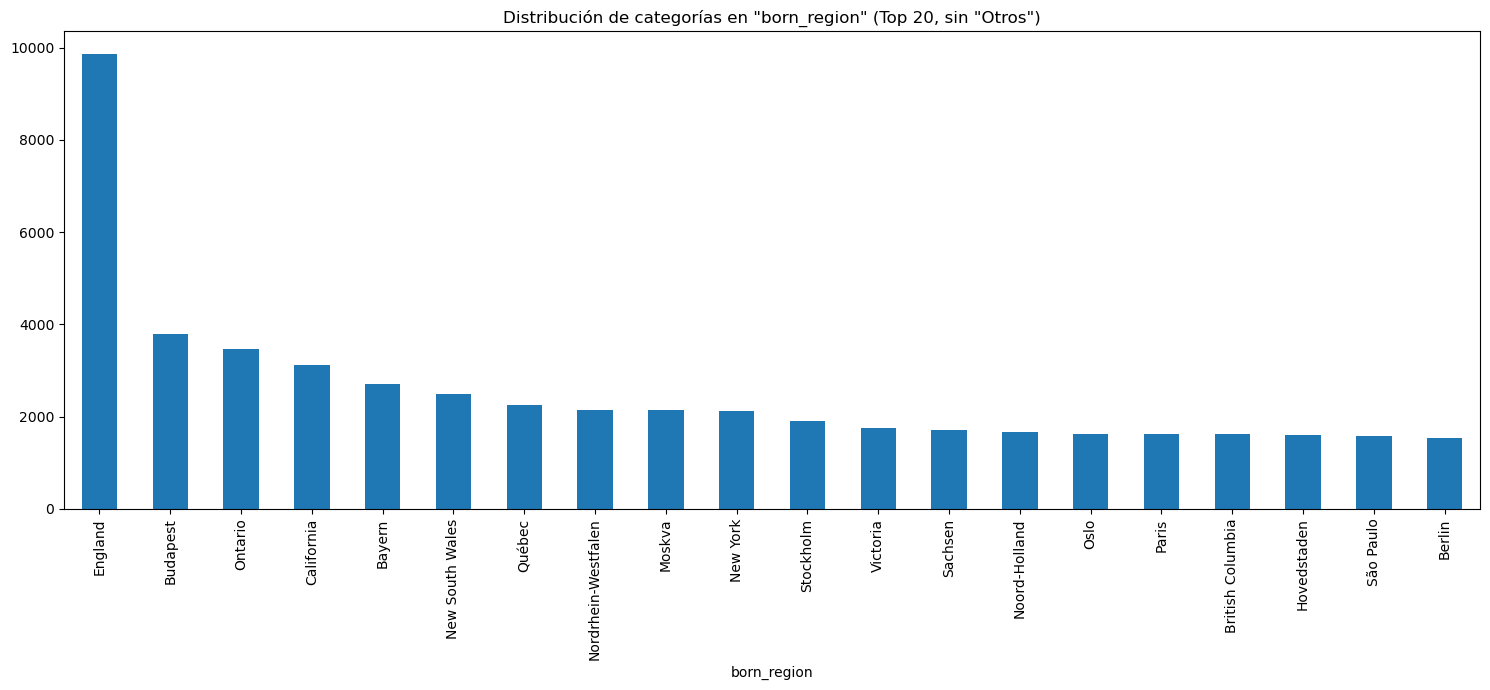

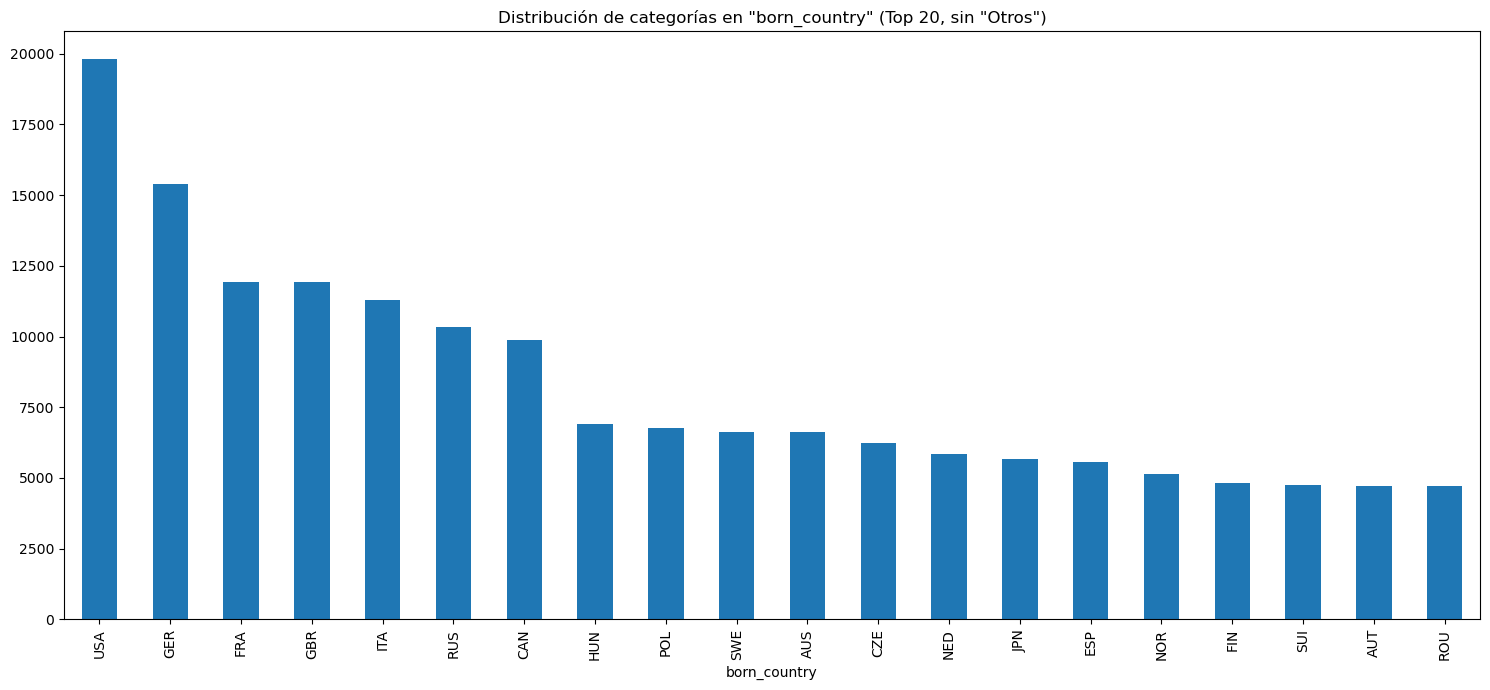

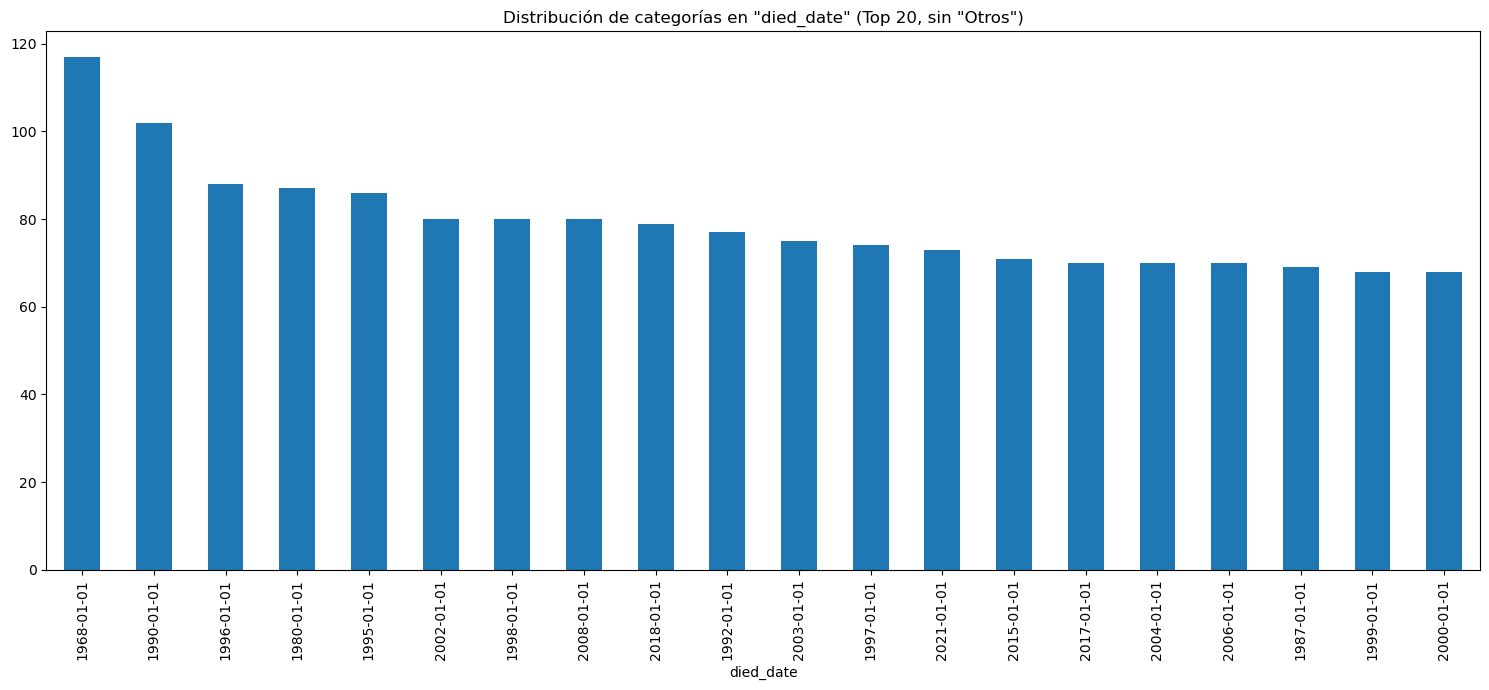

In [41]:
def agrupar_categorias(columna, top_n=10):
    # Obtener las categorías más frecuentes
    top = columna.value_counts().nlargest(top_n).index
    # Filtrar las categorías, manteniendo solo las que están en el top
    columna_filtrada = columna[columna.isin(top)]
    return columna_filtrada

# Aplicar la función de agrupamiento a todas las columnas categóricas
categoricas_filtradas = categoricas.apply(lambda col: agrupar_categorias(col, top_n=20))

# Eliminar columnas que estén completamente vacías o solo tengan NaN
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')

# Verificar qué columnas quedaron después de eliminar las vacías
print(f"Columnas después de limpiar NaN: {categoricas_filtradas.columns.tolist()}")

# Filtrar "Otros" y eliminar las filas que contienen "Otros"
categoricas_filtradas = categoricas_filtradas.apply(lambda col: col[col != 'Otros'])

# Verificar que las columnas no queden vacías después de filtrar "Otros"
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')  # Eliminar columnas vacías nuevamente

# Verificamos el contenido después de todas las transformaciones
print(f"Columnas después de eliminar 'Otros' y NaN: {categoricas_filtradas.columns.tolist()}")
print(categoricas_filtradas.head())  # Verificamos algunas filas para revisar los datos

# Graficar solo si hay datos válidos en la columna
for col in categoricas_filtradas.columns:
    if not categoricas_filtradas[col].empty:  # Solo graficamos si la columna no está vacía
        plt.figure(figsize=(15, 7))
        categoricas_filtradas[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de categorías en "{col}" (Top 20, sin "Otros")')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' está vacía después del filtrado y no se graficará.")

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         44139 non-null   object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  height_cm     236910 non-null  float64
 17  weight_kg     227290 non-null  float64
 18  died

# DATA CLEANING

## Imputar en faltantes de columna Medals por "No Medals"

In [45]:
merged_df['medal'] = merged_df['medal'].fillna('No Medal')

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         308408 non-null  object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  height_cm     236910 non-null  float64
 17  weight_kg     227290 non-null  float64
 18  died

## Eliminar registros donde el valor en la columna 'year' son faltantes

Aproxiimadamente un 1%

In [48]:
merged_df = merged_df.dropna(subset=['year'])  # Elimina filas donde esa columna tenga NaN

merged_df['year'] = merged_df['year'].astype(int)

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         281519 non-null  float64
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     236354 non-null  float64
 17  weight_kg     226849 non-null  float64
 18  died_date

## Cambiamos el tipo de dato a la columna 'place' (float -> int)

In [51]:
merged_df['place'] = merged_df['place'].fillna(999).astype(int)

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     236354 non-null  float64
 17  weight_kg     226849 non-null  float64
 18  died_date

## Imputamos los valores faltantes de las columnas 'height_cm' y 'weight_cm'

In [54]:
merged_df['height_cm'] = merged_df['height_cm'].fillna(merged_df['height_cm'].median())

In [55]:
merged_df['weight_kg'] = merged_df['weight_kg'].fillna(merged_df['weight_kg'].median())

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     305807 non-null  float64
 17  weight_kg     305807 non-null  float64
 18  died_date

## Imputamos los valores faltantes de la columna 'team' con el valor 'no team'

In [58]:
merged_df['team'] = merged_df['team'].fillna('no team')

In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          305807 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     305807 non-null  float64
 17  weight_kg     305807 non-null  float64
 18  died_date

## Eliminar registros nulos en la columna 'discipline'

In [61]:
merged_df = merged_df.dropna(subset=['discipline'])

In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305806 entries, 0 to 308406
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305806 non-null  int64  
 1   type          305806 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305806 non-null  object 
 4   as            305806 non-null  object 
 5   athlete_id    305806 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          305806 non-null  object 
 8   place         305806 non-null  int64  
 9   tied          305806 non-null  bool   
 10  medal         305806 non-null  object 
 11  name          305806 non-null  object 
 12  born_date     303629 non-null  object 
 13  born_city     245241 non-null  object 
 14  born_region   245241 non-null  object 
 15  born_country  245241 non-null  object 
 16  height_cm     305806 non-null  float64
 17  weight_kg     305806 non-null  float64
 18  died_date

## Comprobacion y eliminacion de registros duplicados

In [64]:
merged_df.duplicated().sum()

126

In [65]:
# merged_df = merged_df.drop_duplicates()

## Cambiar el tipo de dato de la columna 'born_date'

In [67]:
merged_df['born_date'] = pd.to_datetime(merged_df['born_date'])

In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305806 entries, 0 to 308406
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          305806 non-null  int64         
 1   type          305806 non-null  object        
 2   discipline    305806 non-null  object        
 3   event         305806 non-null  object        
 4   as            305806 non-null  object        
 5   athlete_id    305806 non-null  int64         
 6   noc           305806 non-null  object        
 7   team          305806 non-null  object        
 8   place         305806 non-null  int64         
 9   tied          305806 non-null  bool          
 10  medal         305806 non-null  object        
 11  name          305806 non-null  object        
 12  born_date     303629 non-null  datetime64[ns]
 13  born_city     245241 non-null  object        
 14  born_region   245241 non-null  object        
 15  born_country  245241 n

## Eliminar columnas 'born_city', 'born_region' 'as' (duplicada con 'name') y 'died_date'

In [70]:
merged_df.drop(columns=['born_city', 'born_region', 'died_date', 'as'], inplace=True)

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305806 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          305806 non-null  int64         
 1   type          305806 non-null  object        
 2   discipline    305806 non-null  object        
 3   event         305806 non-null  object        
 4   athlete_id    305806 non-null  int64         
 5   noc           305806 non-null  object        
 6   team          305806 non-null  object        
 7   place         305806 non-null  int64         
 8   tied          305806 non-null  bool          
 9   medal         305806 non-null  object        
 10  name          305806 non-null  object        
 11  born_date     303629 non-null  datetime64[ns]
 12  born_country  245241 non-null  object        
 13  height_cm     305806 non-null  float64       
 14  weight_kg     305806 non-null  float64       
dtypes: bool(1), datetime64

In [72]:
merged_df.describe()

,year,athlete_id,place,born_date,height_cm,weight_kg
count,305806.000000,305806.000000,305806.000000,303629,305806.000000,305806.000000
mean,1982.239093,72727.944844,94.212095,1957-06-04 22:28:32.018285568,175.266215,70.406277
min,1896.000000,1.000000,1.000000,1828-10-25 00:00:00,127.000000,25.000000
25%,1964.000000,34370.000000,5.000000,1939-03-25 00:00:00,170.000000,64.000000
50%,1992.000000,73643.500000,10.000000,1965-06-26 00:00:00,175.000000,70.000000
75%,2008.000000,107254.000000,26.000000,1981-08-17 00:00:00,180.000000,75.000000
max,2022.000000,148985.000000,999.000000,2009-01-01 00:00:00,226.000000,198.000000
std,30.983949,41375.018359,266.408691,NaN,9.194139,12.205212


## Eliminar registros nulos en la columna 'born_date'

In [74]:
merged_df = merged_df.dropna(subset=['born_date'])

In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303629 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303629 non-null  int64         
 1   type          303629 non-null  object        
 2   discipline    303629 non-null  object        
 3   event         303629 non-null  object        
 4   athlete_id    303629 non-null  int64         
 5   noc           303629 non-null  object        
 6   team          303629 non-null  object        
 7   place         303629 non-null  int64         
 8   tied          303629 non-null  bool          
 9   medal         303629 non-null  object        
 10  name          303629 non-null  object        
 11  born_date     303629 non-null  datetime64[ns]
 12  born_country  245137 non-null  object        
 13  height_cm     303629 non-null  float64       
 14  weight_kg     303629 non-null  float64       
dtypes: bool(1), datetime64

In [76]:
merged_df['born_country'].describe()

count     245137
unique       236
top          USA
freq       19686
Name: born_country, dtype: object

## Imputar valores faltantes en 'born_country' con los valores que contenga la columna 'noc'

In [78]:
merged_df['born_country'].fillna(merged_df['noc'], inplace=True)

In [79]:
merged_df['born_country'].describe()

count     303629
unique       258
top          USA
freq       21233
Name: born_country, dtype: object

In [80]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303629 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303629 non-null  int64         
 1   type          303629 non-null  object        
 2   discipline    303629 non-null  object        
 3   event         303629 non-null  object        
 4   athlete_id    303629 non-null  int64         
 5   noc           303629 non-null  object        
 6   team          303629 non-null  object        
 7   place         303629 non-null  int64         
 8   tied          303629 non-null  bool          
 9   medal         303629 non-null  object        
 10  name          303629 non-null  object        
 11  born_date     303629 non-null  datetime64[ns]
 12  born_country  303629 non-null  object        
 13  height_cm     303629 non-null  float64       
 14  weight_kg     303629 non-null  float64       
dtypes: bool(1), datetime64